# World Happiness Report – GDP vs. Happiness Correlation

Dataset: World Happiness Report (Kaggle)

**Introduction**

The World Happiness Report provides a comprehensive ranking of countries based on various factors that contribute to overall happiness. This project aims to investigate the correlation between economic indicators, such as GDP, and happiness scores, while also examining the impact of social factors like social support and life expectancy. By analyzing this data, we can gain insights into what drives happiness across different countries and cultures.


In [85]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### LOADING DATA 

In [16]:
#Upload and group the files
files =[ 'world-happiness-report.csv',
                '2021.csv',
                '2022.csv',
                '2023.csv',
                '2024.csv']
WHR_df = pd.DataFrame()
for file in files:
    
    df = pd.read_csv(file,encoding='utf-8')
    WHR_df= pd.concat([df,WHR_df])

In [18]:
WHR_df.head()

,Country name,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Positive affect,Negative affect
0,Finland,1.0,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,NaN,NaN,NaN,NaN,NaN,NaN
1,Denmark,2.0,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,NaN,NaN,NaN,NaN,NaN,NaN
2,Iceland,3.0,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,NaN,NaN,NaN,NaN,NaN,NaN
3,Sweden,4.0,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,NaN,NaN,NaN,NaN,NaN,NaN
4,Israel,5.0,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
WHR_df.info

<bound method DataFrame.info of      Country name  Happiness Rank  Happiness score  Upperwhisker  \
0         Finland             1.0            7.741         7.815   
1         Denmark             2.0            7.583         7.665   
2         Iceland             3.0            7.525         7.618   
3          Sweden             4.0            7.344         7.422   
4          Israel             5.0            7.341         7.405   
...           ...             ...              ...           ...   
1944     Zimbabwe             NaN              NaN           NaN   
1945     Zimbabwe             NaN              NaN           NaN   
1946     Zimbabwe             NaN              NaN           NaN   
1947     Zimbabwe             NaN              NaN           NaN   
1948     Zimbabwe             NaN              NaN           NaN   

      Lowerwhisker  Economy (GDP per Capita)\t  Social support  \
0            7.667                       1.844           1.572   
1            7.500 

In [22]:
WHR_df.describe()

,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Positive affect,Negative affect
count,575.000000,575.000000,575.000000,575.000000,572.000000,2508.000000,571.000000,2489.000000,2432.000000,2411.000000,1949.000000,1949.000000,1913.000000,1894.000000,1927.000000,1933.000000
mean,72.443478,5.538454,5.657216,5.419657,1.289007,0.853576,0.500541,0.696735,0.036619,0.604837,2013.216008,5.466705,9.368453,63.359374,0.710003,0.268544
std,41.649607,1.114811,1.095223,1.135588,0.459035,0.205785,0.196285,0.167786,0.161653,0.308787,4.166828,1.115711,1.154084,7.510245,0.107100,0.085168
min,1.000000,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,-0.335000,0.000000,2005.000000,2.375000,6.635000,32.300000,0.322000,0.083000
25%,36.500000,4.833000,4.978500,4.701500,0.965750,0.751750,0.358500,0.591000,-0.083000,0.320500,2010.000000,4.640000,8.464000,58.685000,0.625500,0.206000
50%,72.000000,5.661000,5.775000,5.520000,1.353000,0.854500,0.535000,0.716000,0.033500,0.743000,2013.000000,5.386000,9.460000,65.200000,0.722000,0.258000
75%,108.000000,6.332500,6.452500,6.244000,1.665750,0.928000,0.641000,0.828000,0.141000,0.852000,2017.000000,6.283000,10.353000,68.590000,0.799000,0.320000
max,149.000000,7.842000,7.904000,7.780000,2.209000,1.620000,0.942000,0.985000,0.698000,0.983000,2020.000000,8.019000,11.648000,77.100000,0.944000,0.705000


In [28]:
WHR_df.isnull().sum()

Country name                           0
Happiness Rank                      1949
Happiness score                     1949
Upperwhisker                        1949
Lowerwhisker                        1949
Economy (GDP per Capita)\t          1952
Social support                        16
Healthy life expectancy             1953
Freedom to make life choices          35
Generosity                            92
Perceptions of corruption            113
year                                 575
Life Ladder                          575
Log GDP per capita                   611
Healthy life expectancy at birth     630
Positive affect                      597
Negative affect                      591
dtype: int64

In [26]:
WHR_df = WHR_df.drop_duplicates()

### Data Cleaning and Preprocessing

In [38]:
WHR_df .duplicated().sum()


0

In [40]:
WHR_df .dtypes

Country name                         object
Happiness Rank                      float64
Happiness score                     float64
Upperwhisker                        float64
Lowerwhisker                        float64
Economy (GDP per Capita)\t          float64
Social support                      float64
Healthy life expectancy             float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
year                                float64
Life Ladder                         float64
Log GDP per capita                  float64
Healthy life expectancy at birth    float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [44]:
# Impute missing values with mean or median
for col in WHR_df .columns:
    if WHR_df [col].dtype == np.float64 or WHR_df [col].dtype == np.int64:
        WHR_df [col] = WHR_df [col].fillna(WHR_df [col].mean())

In [48]:
WHR_df.head()

,Country name,Happiness Rank,Happiness score,Upperwhisker,Lowerwhisker,Economy (GDP per Capita)\t,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Positive affect,Negative affect
0,Finland,1.0,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2013.216008,5.466705,9.368453,63.359374,0.710003,0.268544
1,Denmark,2.0,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,2013.216008,5.466705,9.368453,63.359374,0.710003,0.268544
2,Iceland,3.0,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2013.216008,5.466705,9.368453,63.359374,0.710003,0.268544
3,Sweden,4.0,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,2013.216008,5.466705,9.368453,63.359374,0.710003,0.268544
4,Israel,5.0,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2013.216008,5.466705,9.368453,63.359374,0.710003,0.268544


### Correlation Analysis


In [50]:
# Separate numerical and categorical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


                              Happiness Rank  Happiness score  Upperwhisker  \
Happiness Rank                      1.000000        -0.977044     -0.975400   
Happiness score                    -0.977044         1.000000      0.999678   
Upperwhisker                       -0.975400         0.999678      1.000000   
Lowerwhisker                       -0.978033         0.999697      0.998750   
Economy (GDP per Capita)\t         -0.789149         0.767181      0.760305   
Social support                     -0.787972         0.812142      0.809952   
Healthy life expectancy            -0.762878         0.758352      0.749563   
Freedom to make life choices       -0.614257         0.643342      0.645037   
Generosity                         -0.119347         0.129815      0.129347   
Perceptions of corruption          -0.493045         0.451052      0.447964   

                              Lowerwhisker  Economy (GDP per Capita)\t  \
Happiness Rank                   -0.978033              

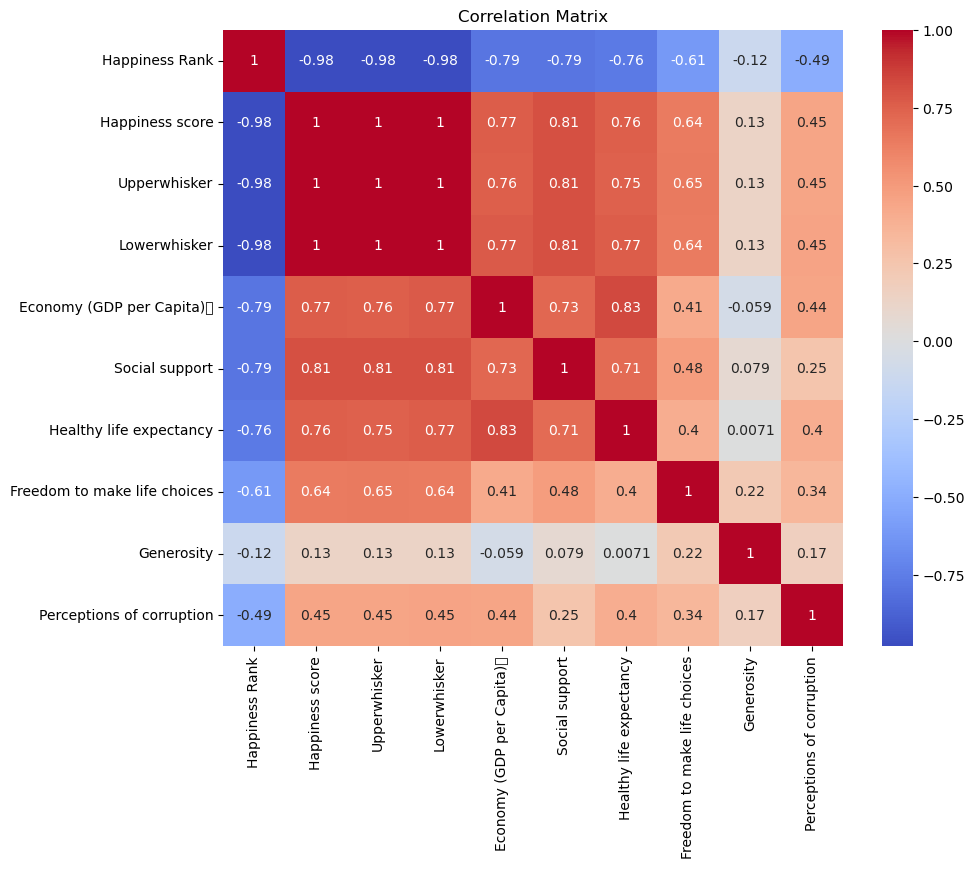

In [87]:
# Perform correlation analysis on numerical variables
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



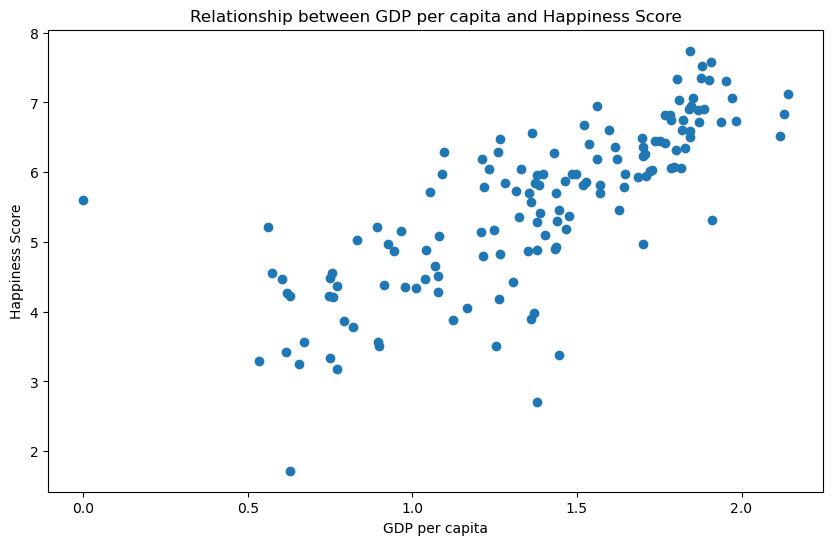

In [58]:
# Scatter plot
# Define the variables
x = df['Economy (GDP per Capita)\t']
y = df['Happiness score']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per capita and Happiness Score')
plt.show()

# Clustering Analysis

Let's perform clustering analysis to group countries based on happiness drivers.

In [89]:
from sklearn.cluster import KMeans

# Select relevant features
features = df[['Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_features)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

## Analyzing Cluster Characteristics

Let's analyze the characteristics of each cluster.

In [64]:
# Group by cluster and calculate mean values
cluster_means = df.groupby('Cluster')[['Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Happiness score']].mean()

# Print cluster means
print(cluster_means)

         Economy (GDP per Capita)\t  Social support  Healthy life expectancy  \
Cluster                                                                        
0                          1.815184        1.409490                 0.674939   
1                          1.018875        1.078125                 0.380437   
2                          1.400400        1.211326                 0.553710   
3                          0.991625        0.352000                 0.403250   
4                          0.815500        0.723208                 0.276292   

         Happiness score  
Cluster                   
0               6.597061  
1               4.781438  
2               5.640630  
3               3.565875  
4               4.278708  


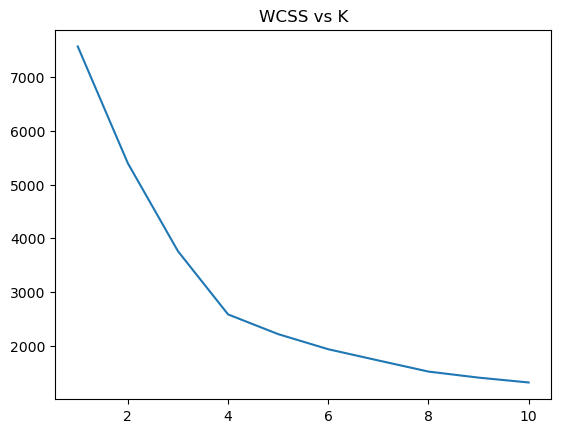

In [91]:
# Select relevant features
features = WHR_df [['Economy (GDP per Capita)\t', 'Social support', 'Freedom to make life choices']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs K
plt.plot(range(1, 11), wcss)
plt.title('WCSS vs K')
plt.show()

In [93]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Visualize the clusters

We'll visualize the clusters using a scatter plot.

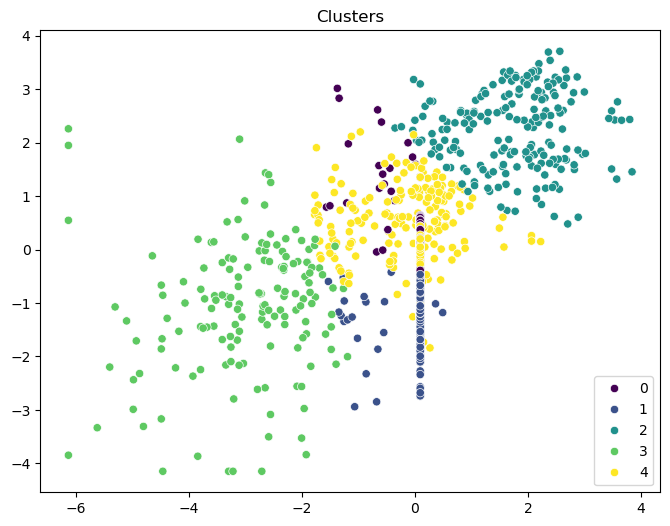

In [74]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters')
plt.show()

In [ ]:
Analyze the impact of social support, freedom, and corruption perceptions on happiness

We'll analyze the impact of social support, freedom, and corruption perceptions on happiness.

In [77]:
# Calculate correlation coefficients 
social_support_corr = WHR_df['Social support'].corr( WHR_df['Happiness score'])
freedom_corr = WHR_df['Freedom to make life choices'].corr( WHR_df['Happiness score'])
corruption_corr =  WHR_df['Perceptions of corruption'].corr( WHR_df['Happiness score'])

print(f'Correlation between social support and happiness: {social_support_corr:.2f}')
print(f'Correlation between freedom and happiness: {freedom_corr:.2f}')
print(f'Correlation between corruption perceptions and happiness: {corruption_corr:.2f}')

Correlation between social support and happiness: 0.55
Correlation between freedom and happiness: 0.26
Correlation between corruption perceptions and happiness: 0.08


In [ ]:
Identify the top 10 happiest countries

We'll identify the top 10 happiest countries based on the happiness score.

In [83]:
# Sort the data by happiness score in descending order
top_10_happiest_countries = WHR_df.sort_values(by='Happiness score', ascending=False).head(10)

print(top_10_happiest_countries[['Country name', 'Happiness score']])

  Country name  Happiness score
0      Finland            7.842
0      Finland            7.821
0      Finland            7.804
0      Finland            7.741
1      Denmark            7.636
1      Denmark            7.620
1      Denmark            7.586
1      Denmark            7.583
2  Switzerland            7.571
2      Iceland            7.557


# Conclusion

The World Happiness Report analysis reveals that happiness is influenced by a combination of economic, social, and psychological factors. The key findings are:

Strong correlation between GDP per capita and happiness: Countries with higher GDP per capita tend to have higher happiness levels.
Social support is crucial: Social support systems, such as family and friends, play a significant role in determining happiness levels.
Freedom and autonomy matter: Freedom to make life choices is an important factor in determining happiness levels.
Corruption perceptions impact happiness: Lower perceptions of corruption are associated with higher happiness levels.


# Policy Recommendations

Based on the analysis, policymakers can consider the following recommendations:

Invest in social support systems: Strengthening social support systems, such as family and community programs, can improve happiness levels.
Promote freedom and autonomy: Policies that promote freedom and autonomy, such as democratic institutions and human rights, can contribute to higher happiness levels.
Reduce corruption: Efforts to reduce corruption and promote transparency can improve trust and stability, leading to higher happiness levels.
Foster economic growth: Economic growth and development can contribute to higher happiness levels, but it is essential to ensure that growth is equitable and sustainable.

